In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2

## 0. EDA och filhantering

b)

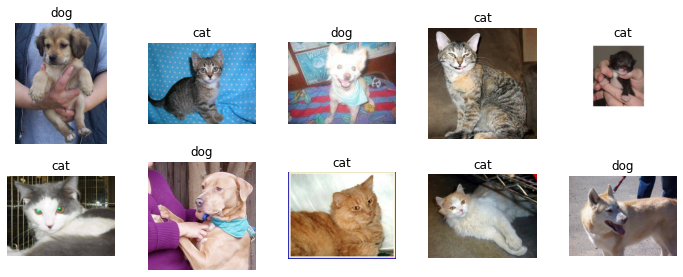

In [2]:
from dataset_split import get_filenames_from_path, gen_filename_dataframe
from image_operations import display_images

original_train_dir = os.path.abspath("./original_data/train/train")
train_pictures_filenames = get_filenames_from_path(original_train_dir)
train_pictures_one_hot = gen_filename_dataframe(train_pictures_filenames)

display_images(train_pictures_one_hot, original_train_dir)

In [3]:
train_pictures_one_hot.head()

,filename,label
0,dog.8011.jpg,0
1,cat.5077.jpg,1
2,dog.7322.jpg,0
3,cat.2718.jpg,1
4,cat.10151.jpg,1


c) Folder structure is created by running script *folder_structure.py*  

d)

In [4]:
from dataset_split import Complete_set_split_filenames

small_train_filenames, small_val_filenames, small_test_filenames = Complete_set_split_filenames(train_pictures_one_hot, (800,200,250))
tiny_train_filenames, tiny_val_filenames, tiny_test_filemnames = Complete_set_split_filenames(train_pictures_one_hot, (80,20,25))
small_train_filenames.label.count()

1600

In [5]:
train_pictures_one_hot.shape # [0] Should decrease each time as Complete split filenames is run, as Inplace = True, thus we avoid data leakage

(22250, 2)

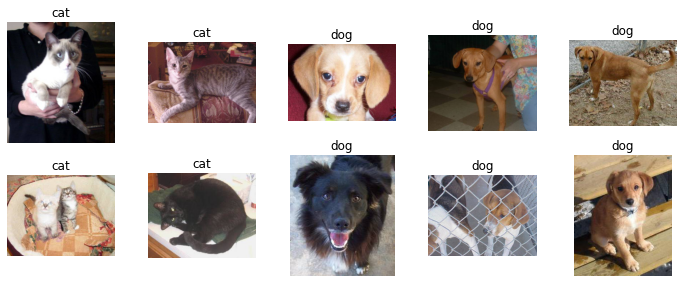

In [6]:
display_images(small_train_filenames, original_train_dir)

<AxesSubplot:xlabel='label', ylabel='count'>

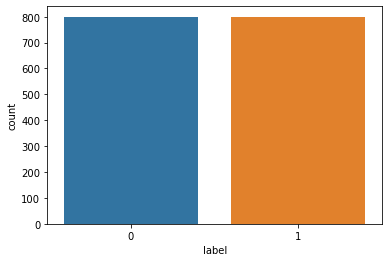

In [7]:
sns.countplot(data=small_train_filenames, x='label')

## 1. Bildbehandling

a)

In [8]:
from image_operations import extract_dimesion_distribution

small_train_sizes, small_train_oversized_pictures = extract_dimesion_distribution(small_train_filenames,original_train_dir)
small_val_sizes, small_val_oversized_pictures = extract_dimesion_distribution(small_val_filenames,original_train_dir)
small_test_sizes, small_test_oversized_pictures = extract_dimesion_distribution(small_test_filenames,original_train_dir)

small_sets_sizes = [small_train_sizes, small_val_sizes, small_test_sizes]

oversized pictures : []
oversized pictures : []
oversized pictures : []


In [9]:
len(small_train_sizes), len(small_train_filenames), len(small_val_sizes), len(small_val_filenames), len(small_test_filenames)

(1600, 1600, 400, 400, 500)

In [10]:
small_sets = [small_train_filenames, small_val_filenames, small_test_filenames]

for set in small_sets:
    set.reset_index(inplace=True)


small_train_dimesions_df = pd.DataFrame(small_train_sizes, columns =['height', 'width'])
small_train_with_dims = pd.concat([small_train_filenames, small_train_dimesions_df], axis = 1)

small_val_dimesions_df = pd.DataFrame(small_val_sizes, columns =['height', 'width'])
small_val_with_dims = pd.concat([small_val_filenames, small_val_dimesions_df], axis = 1)

small_test_dimesions_df = pd.DataFrame(small_test_sizes, columns =['height', 'width'])
small_test_with_dims = pd.concat([small_test_filenames, small_test_dimesions_df], axis = 1)

len(small_train_with_dims), len(small_val_with_dims), len(small_test_with_dims)

(1600, 400, 500)

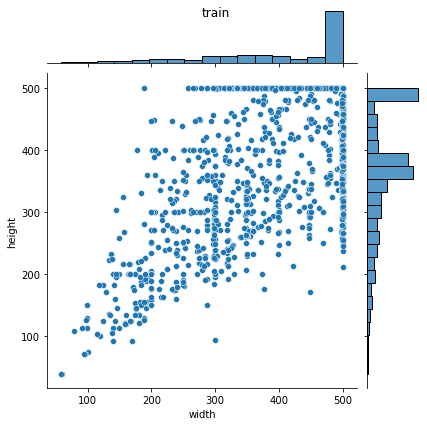

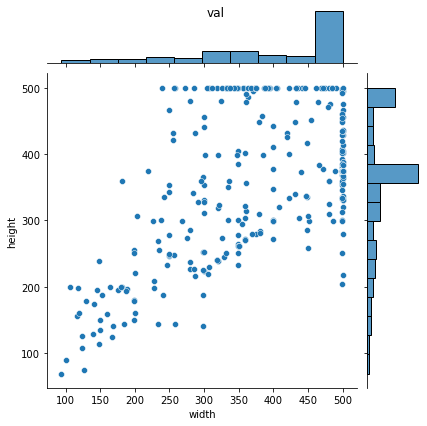

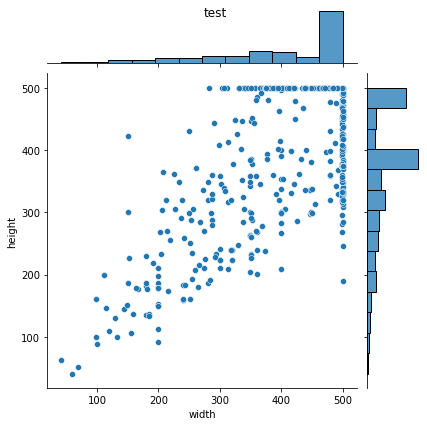

In [11]:
dims_dfs = [small_train_with_dims, small_val_with_dims, small_test_with_dims]
titles = ["train", "val", "test"]

for df, title in zip(dims_dfs, titles):
    sns.jointplot(data=df, x='width', y='height').fig.suptitle(title)




En storlek av 299 x 299 tillåter att de flesta är minskade, samt att vi inte behöver uppscala många av bilderna.

In [12]:
squares = [img for img in small_train_sizes if img[0] == img[1]]
len(squares)
print(f"ratio squares : {len(squares)/len(small_test_with_dims)}")

ratio squares : 0.004


In [13]:
condition = 'height <100 and width <100'
too_small_pics_train = small_train_with_dims.query(condition)
too_small_pics_val = small_val_with_dims.query(condition)
too_small_pics_test = small_test_with_dims.query(condition)

too_small_pics = too_small_pics_train, too_small_pics_val, too_small_pics_test
too_small_pics_train

,index,filename,label,height,width
243,18861,dog.7459.jpg,0,71,96
735,21540,cat.4821.jpg,1,39,60
802,23002,dog.9705.jpg,0,39,59
912,17589,cat.8138.jpg,1,71,95


In [14]:
small_train_with_dims.drop(too_small_pics_train.index, axis = 0, inplace = True)
small_val_with_dims.drop(too_small_pics_val.index, axis = 0, inplace = True)
small_test_with_dims.drop(too_small_pics_test.index, axis = 0, inplace = True)



small_test_with_dims

,index,filename,label,height,width
0,20391,cat.6574.jpg,1,499,358
1,7470,dog.7195.jpg,0,500,468
2,378,dog.10793.jpg,0,346,302
3,7079,dog.5386.jpg,0,499,456
4,24626,cat.208.jpg,1,305,406
...,...,...,...,...,...
494,10206,cat.4286.jpg,1,385,377
495,12047,dog.1330.jpg,0,299,286
496,14517,cat.7231.jpg,1,334,308
497,16464,dog.4083.jpg,0,374,500


In [15]:
from image_operations import read_and_resize_images
X_train_small = read_and_resize_images(small_train_with_dims, original_train_dir,(299,299))
X_val_small = read_and_resize_images(small_val_with_dims, original_train_dir,(299,299))
X_test_small = read_and_resize_images(small_test_with_dims, original_train_dir,(299,299))

In [16]:
X_train_small.shape, X_val_small.shape, X_test_small.shape

((1596, 299, 299, 3), (399, 299, 299, 3), (497, 299, 299, 3))

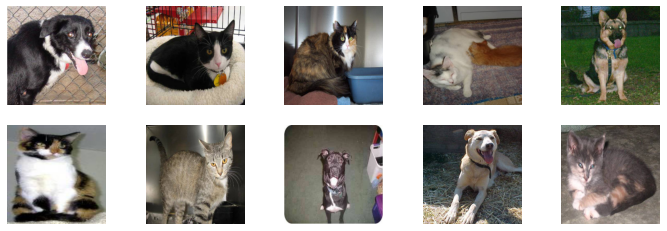

In [17]:
from image_operations import display_images_array

display_images_array(X_val_small)

In [18]:
y_small_train = small_train_with_dims['label']
y_small_val = small_val_with_dims['label']
y_small_test = small_test_with_dims['label']

In [19]:
y_small_test

0      1
1      0
2      0
3      0
4      1
      ..
494    1
495    0
496    1
497    0
498    0
Name: label, Length: 497, dtype: int64

In [20]:
X_sets = [X_train_small, X_val_small, X_test_small]
X_sets_scaled =[]
for X_set in X_sets :
    X_set = X_set.astype("float32")/255
    X_sets_scaled.append(X_set)

X_train = X_sets_scaled[0]
X_val = X_sets_scaled[1] 
X_test = X_sets_scaled[2]

X_train

array([[[[0.6666667 , 0.63529414, 0.627451  ],
         [0.6666667 , 0.63529414, 0.627451  ],
         [0.6666667 , 0.63529414, 0.627451  ],
         ...,
         [0.14509805, 0.14509805, 0.12156863],
         [0.12941177, 0.1254902 , 0.10588235],
         [0.11372549, 0.10588235, 0.09019608]],

        [[0.6666667 , 0.63529414, 0.627451  ],
         [0.6666667 , 0.63529414, 0.627451  ],
         [0.6666667 , 0.63529414, 0.627451  ],
         ...,
         [0.14117648, 0.14117648, 0.11764706],
         [0.1254902 , 0.12156863, 0.10196079],
         [0.10588235, 0.10588235, 0.08627451]],

        [[0.6666667 , 0.63529414, 0.627451  ],
         [0.6666667 , 0.63529414, 0.627451  ],
         [0.6666667 , 0.63529414, 0.627451  ],
         ...,
         [0.13725491, 0.13333334, 0.10980392],
         [0.11764706, 0.11372549, 0.09411765],
         [0.10196079, 0.09803922, 0.08235294]],

        ...,

        [[0.44705883, 0.39607844, 0.36078432],
         [0.45490196, 0.4117647 , 0.3764706 ]

## Data augmentation

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(
    rotation_range=30,
    shear_range=.2,
    zoom_range=.1,
    horizontal_flip=False,
    height_shift_range=.2,
    width_shift_range=.2
)


test_image_generator = ImageDataGenerator()

train_generator = train_image_generator.flow(
    X_train, y_small_train, batch_size=32)

val_generator = test_image_generator.flow(X_val, y_small_val, batch_size=32)

train_generator, val_generator

(<keras.preprocessing.image.NumpyArrayIterator at 0x16b6a23d0>,
 <keras.preprocessing.image.NumpyArrayIterator at 0x16b7b0f70>)

In [23]:
augm_X = []
augm_Y = []


for (ind,img),label in zip(enumerate(X_train),y_small_train) : 
    x = np.expand_dims(img,0)
    iterator = train_image_generator.flow(x, batch_size=32) 

    for _ in range(4) : #4 new image per image
        next_image = np.array(iterator.next()[0])
        augm_X.append(next_image)
        augm_Y.append(label)


augm_X

[array([[[0.15496124, 0.09550387, 0.10726858],
         [0.14478478, 0.08235294, 0.09411765],
         [0.14118376, 0.08235294, 0.09411765],
         ...,
         [0.36202723, 0.2796743 , 0.2053573 ],
         [0.35234874, 0.27152956, 0.20400879],
         [0.33024105, 0.25344142, 0.19395983]],
 
        [[0.1580661 , 0.09924255, 0.11100726],
         [0.14966975, 0.08844855, 0.10021326],
         [0.14302094, 0.08235294, 0.09411765],
         ...,
         [0.33803734, 0.25982022, 0.19750361],
         [0.3167103 , 0.24313726, 0.18854755],
         [0.30465156, 0.24313726, 0.19256714]],
 
        [[0.15990327, 0.10107973, 0.11284444],
         [0.15518129, 0.09579726, 0.10756197],
         [0.14485812, 0.08235294, 0.09411765],
         ...,
         [0.30890408, 0.24313726, 0.19114962],
         [0.29684535, 0.24313726, 0.19516921],
         [0.28167626, 0.23691656, 0.19918878]],
 
        ...,
 
        [[0.34419546, 0.34991726, 0.36920398],
         [0.46769276, 0.46693513, 0.46702

In [24]:
augmented_x_train = np.array(augm_X)
augmented_y_train = np.array(augm_Y)
augmented_x_train.shape, augmented_y_train.shape

((6384, 299, 299, 3), (6384,))

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

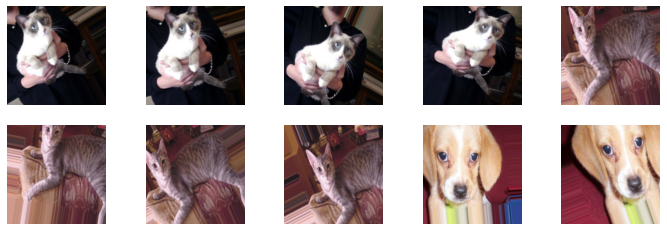

In [25]:
display_images_array(augmented_x_train)
augmented_y_train[0:10]

In [26]:
#Joining original train data with augmented train data
X_train = np.concatenate((X_train, augmented_x_train))
y_train = np.concatenate((y_small_train, augmented_y_train))

X_train.shape, y_train.shape

((7980, 299, 299, 3), (7980,))

In [27]:
steps_per_epoch = int(len(X_train)/32)
validation_steps = int(len(X_val)/32)

steps_per_epoch, validation_steps

(249, 12)

In [26]:
from CNN_models import CNN_model_1

model = CNN_model_1(X_train.shape, drop_rate=.3)
model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0 

In [27]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopper = EarlyStopping(monitor = "val_acc", mode = "max", patience = 5, restore_best_weights = True)

model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    callbacks = [early_stopper],
    validation_data = val_generator,
    validation_steps = validation_steps
)



2022-05-14 22:04:08.325497: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
49/49 [==============================] - 55s 1s/step - loss: 1.8375 - acc: 0.5275 - val_loss: 0.6845 - val_acc: 0.5755
Epoch 2/100
49/49 [==============================] - 55s 1s/step - loss: 0.6969 - acc: 0.5326 - val_loss: 0.6889 - val_acc: 0.5443
Epoch 3/100
49/49 [==============================] - 56s 1s/step - loss: 0.6887 - acc: 0.5281 - val_loss: 0.6919 - val_acc: 0.5026
Epoch 4/100
49/49 [==============================] - 56s 1s/step - loss: 0.6852 - acc: 0.5294 - val_loss: 0.6726 - val_acc: 0.5807
Epoch 5/100
49/49 [==============================] - 55s 1s/step - loss: 0.6860 - acc: 0.5601 - val_loss: 0.7148 - val_acc: 0.4714
Epoch 6/100
49/49 [==============================] - 56s 1s/step - loss: 0.6857 - acc: 0.5518 - val_loss: 0.6640 - val_acc: 0.5807
Epoch 7/100
49/49 [==============================] - 55s 1s/step - loss: 0.6894 - acc: 0.5377 - val_loss: 0.6769 - val_acc: 0.5417
Epoch 8/100
49/49 [==============================] - 56s 1s/step - loss: 0.6826 - a

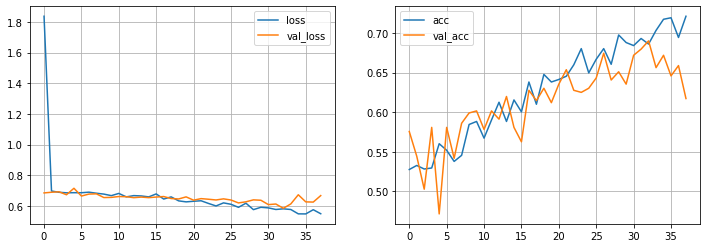

In [28]:
metrics = pd.DataFrame(model.history.history)


def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], grid = True)

plot_metrics(metrics)



Attemps with other image generation parameters and more patience on the early stopping

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_image_generator_gen_2 = ImageDataGenerator(
    rotation_range=50,
    shear_range=.2,
    zoom_range=.1,
    horizontal_flip=False,
    vertical_flip=True,
    height_shift_range=.2,
    width_shift_range=.2
)


test_image_generator = ImageDataGenerator()

train_generator = train_image_generator_gen_2.flow(
    X_train, y_small_train, batch_size=32)

val_generator = test_image_generator.flow(X_val, y_small_val, batch_size=32)

train_generator, val_generator

(<keras.preprocessing.image.NumpyArrayIterator at 0x14b896fa0>,
 <keras.preprocessing.image.NumpyArrayIterator at 0x12f2c90a0>)

In [32]:
from CNN_models import CNN_model_2

model_2 = CNN_model_2(X_train.shape, drop_rate=.2)
model_2.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0 

In [33]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopper = EarlyStopping(monitor = "val_acc", mode = "max", patience = 10, restore_best_weights = True)

model_2.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    callbacks = [early_stopper],
    validation_data = val_generator,
    validation_steps = validation_steps
)

2022-05-15 12:51:01.418012: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
49/49 [==============================] - 57s 1s/step - loss: 4.7104 - acc: 0.5096 - val_loss: 0.6961 - val_acc: 0.5104
Epoch 2/100
49/49 [==============================] - 56s 1s/step - loss: 0.8935 - acc: 0.5051 - val_loss: 0.6958 - val_acc: 0.5104
Epoch 3/100
49/49 [==============================] - 55s 1s/step - loss: 0.7184 - acc: 0.4974 - val_loss: 0.6922 - val_acc: 0.5286
Epoch 4/100
49/49 [==============================] - 55s 1s/step - loss: 0.7237 - acc: 0.5236 - val_loss: 0.7073 - val_acc: 0.5104
Epoch 5/100
49/49 [==============================] - 55s 1s/step - loss: 0.7225 - acc: 0.5473 - val_loss: 0.6862 - val_acc: 0.5417
Epoch 6/100
49/49 [==============================] - 55s 1s/step - loss: 0.7595 - acc: 0.5536 - val_loss: 0.6659 - val_acc: 0.5703
Epoch 7/100
49/49 [==============================] - 55s 1s/step - loss: 0.6898 - acc: 0.5932 - val_loss: 0.6853 - val_acc: 0.6094
Epoch 8/100
49/49 [==============================] - 55s 1s/step - loss: 0.6907 - a

In [32]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], grid = True)

metrics_2 = pd.DataFrame(model_2.history.history)
plot_metrics(metrics_2)


NameError: name 'model_2' is not defined

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       250
           1       0.71      0.80      0.75       249

    accuracy                           0.74       499
   macro avg       0.74      0.74      0.74       499
weighted avg       0.74      0.74      0.74       499



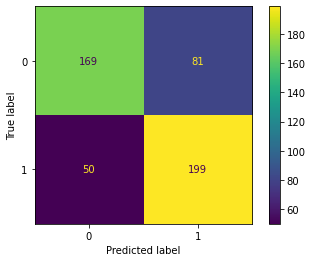

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred) #Transforms coninous y_pred into binary

print(classification_report(y_small_test, y_pred))
cm = confusion_matrix(y_small_test, y_pred)
ConfusionMatrixDisplay(cm).plot()



In [46]:
models_save_path = os.path.abspath("./saved_kerad_models")
model_2.save(models_save_path)

2022-05-15 14:00:30.385651: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/leolassarade/GitHub-project/Deep-Learning-21/Labb/saved_kerad_models/assets


In [30]:
from CNN_models import CNN_model_2

from tensorflow.keras.callbacks import EarlyStopping


early_stopper = EarlyStopping(monitor = "val_acc", mode = "max", patience = 10, restore_best_weights = True)

model_3 = CNN_model_2(X_train.shape, drop_rate=.2)

model_3.fit(
    X_train,
    y_train,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    callbacks = [early_stopper],
    validation_data = val_generator,
    validation_steps = validation_steps
)

2022-05-15 16:45:10.870493: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
249/249 [==============================] - 301s 1s/step - loss: 3.1621 - acc: 0.5572 - val_loss: 0.6323 - val_acc: 0.6380
Epoch 2/100
249/249 [==============================] - 287s 1s/step - loss: 0.6423 - acc: 0.6549 - val_loss: 0.6012 - val_acc: 0.6536
Epoch 3/100
249/249 [==============================] - 285s 1s/step - loss: 0.5913 - acc: 0.6959 - val_loss: 0.5851 - val_acc: 0.6901
Epoch 4/100
249/249 [==============================] - 286s 1s/step - loss: 0.5365 - acc: 0.7411 - val_loss: 0.7469 - val_acc: 0.6432
Epoch 5/100
249/249 [==============================] - 288s 1s/step - loss: 0.4657 - acc: 0.7880 - val_loss: 0.6022 - val_acc: 0.7031
Epoch 6/100
249/249 [==============================] - 291s 1s/step - loss: 0.3974 - acc: 0.8313 - val_loss: 0.8333 - val_acc: 0.7318
Epoch 7/100
249/249 [==============================] - 289s 1s/step - loss: 0.3365 - acc: 0.8554 - val_loss: 0.9568 - val_acc: 0.7109
Epoch 8/100
249/249 [==============================] - 299s 1s

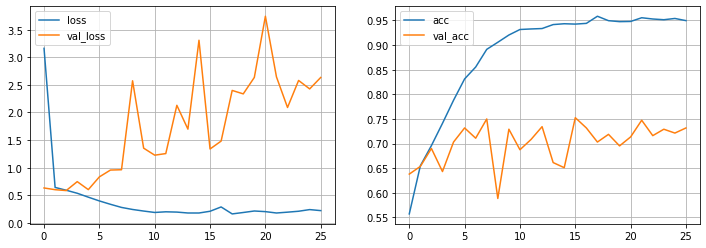

In [33]:
metrics_3 = pd.DataFrame(model_3.history.history)
plot_metrics(metrics_3)

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       248
           1       0.72      0.82      0.77       249

    accuracy                           0.75       497
   macro avg       0.76      0.75      0.75       497
weighted avg       0.76      0.75      0.75       497



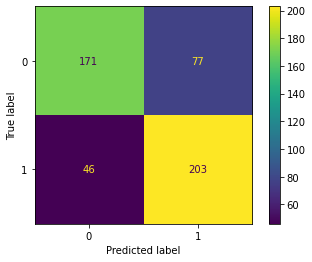

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)
y_pred = np.round(y_pred) #Transforms coninous y_pred into binary

print(classification_report(y_small_test, y_pred))
cm = confusion_matrix(y_small_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Transfer learning

Model: Xception, based on Depthwise Separable Convolutions.

I first need to mention Inception models, as Xception is in fact short for "Xtreme Inception". Xception is deeply linked to the Inception models that were first implemented in 2014, have evolved a few times, and are considered to be one of the best performing models on ImageNet, and more.

The model is named so as it is has a stronger version of the underlying hypotesis used in Inception, and is the following : **hat the mapping of cross-channels correlations and spatial correlations in the feature maps of convolutional neural networks can be entirely decoupled**

Inception modules are working by laying somewhere between convolutions and depthwise separable convolutions, whereas  Xception solely relies on Depthwise Separable Convolutions; a depthwise convolution followed by a pointwise convolution. 

In a depthwise convolution, convolutions are computed d * d * 1 instead of d * d * C (C for Channel) to create the output, we don't go trhough all the channels, as RGB in pictures. Then, over the K*K*C volume created this way, a classical convolution 1 * 1 * N is applied, resulting as a K * K * N. THis process reduces the number of operations by 1/N. **Note that in just Xception, these two steps are inversed.** 


The parameter count of the model is the same as in Inception V3, it has 36 convolutional layers . Xception shows small gains in classification performance on the ImageNet dataset and large gains on the JFT dataset

According to the authors, depthwise separable convolutions *offer similar properties as Inception modules, yet are as easy to use as regular convolution layers.*, and one of their main conclusions is that it should become a cornerstone in the field of CNN.

In [40]:
from tensorflow.keras.applications import Xception

base_model = Xception(weights="imagenet", include_top=False,
                   input_shape=(X_train.shape[1:]))

base_model.summary()



83697664/83683744 [==============================] - 3s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(.5),
    Dense(256, activation="relu", kernel_initializer="he_normal"),
    Dropout(.5),
    Dense(1, activation="sigmoid")
], name = "Xception_transfer")

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["acc"])
model.summary()


Model: "Xception_transfer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                 

In [56]:
early_stopper = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
model.fit(X_train, y_train, epochs = 20, validation_data = (X_val, y_small_val), callbacks=early_stopper)

Epoch 1/20
250/250 [==============================] - 556s 2s/step - loss: 0.0494 - acc: 0.9831 - val_loss: 0.0157 - val_acc: 0.9925
Epoch 2/20
250/250 [==============================] - 551s 2s/step - loss: 0.0195 - acc: 0.9935 - val_loss: 0.0177 - val_acc: 0.9925
Epoch 3/20
250/250 [==============================] - 568s 2s/step - loss: 0.0227 - acc: 0.9922 - val_loss: 0.0138 - val_acc: 0.9950
Epoch 4/20
250/250 [==============================] - 567s 2s/step - loss: 0.0200 - acc: 0.9932 - val_loss: 0.0159 - val_acc: 0.9925
Epoch 5/20
250/250 [==============================] - 574s 2s/step - loss: 0.0146 - acc: 0.9955 - val_loss: 0.0139 - val_acc: 0.9975
Epoch 6/20
250/250 [==============================] - 571s 2s/step - loss: 0.0119 - acc: 0.9956 - val_loss: 0.0189 - val_acc: 0.9950
Epoch 7/20
250/250 [==============================] - 566s 2s/step - loss: 0.0131 - acc: 0.9949 - val_loss: 0.0098 - val_acc: 0.9950
Epoch 8/20
250/250 [==============================] - 593s 2s/step - 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00       249

    accuracy                           1.00       497
   macro avg       1.00      1.00      1.00       497
weighted avg       1.00      1.00      1.00       497



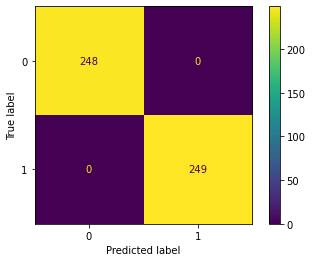

In [57]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred) #Transforms coninous y_pred into binary

print(classification_report(y_small_test, y_pred))
cm = confusion_matrix(y_small_test, y_pred)
ConfusionMatrixDisplay(cm).plot()